In [17]:
from jogoDeForca import JogoDeForca

In [18]:
def calcular_presenca_nas_palavras(letra, palavras):
    qtd_palavras_com_a_letra = 0
    for palavra in palavras:
        if letra in palavra:
            qtd_palavras_com_a_letra+=1
    return qtd_palavras_com_a_letra

def escolher_letra_em_mais_palavras(letras_restantes, palavras):
    qtd_max = 0
    letra_max = ''
    for letra in letras_restantes:
        if qtd_max < calcular_presenca_nas_palavras(letra, palavras):
            letra_max = letra
    return letra_max

In [ ]:
def exibir_estado(palavra_parcial, vidas):
    print("Palavra:", " ".join(palavra_parcial))
    print("Vidas restantes:", vidas)


In [19]:
def palavra_compatible(palavra, palavra_parcial, tentativa):
    if len(palavra) != len(palavra_parcial):
        return False

    for idx, letra in enumerate(palavra_parcial):
        if letra == "_" and palavra[idx] == tentativa:
            return False
        if letra != "_" and palavra[idx] != letra:
            return False
    return True

def jogar(jogo):
    tamanho_palavra = jogo.novo_jogo()
    palavra_parcial = ["_" for _ in range(tamanho_palavra)]
    vidas = jogo.vidas
    palavras_possiveis = jogo.content.copy()
    ## create a set with all letters
    letras_restantes = {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm','n','o','p','q','r','s','t','u','v','w','x','y','z'}

    while "_" in palavra_parcial and vidas > 0:    
        tentativa = escolher_letra_em_mais_palavras(letras_restantes, palavras_possiveis)
        letras_restantes.remove(tentativa)

        indices = jogo.tentar_letra(tentativa)
        if indices:
            for idx in indices:
                palavra_parcial[idx] = tentativa
            palavras_possiveis = [palavra for palavra in palavras_possiveis if palavra_compatible(palavra, palavra_parcial, tentativa)]
        else:
            palavras_possiveis = [palavra for palavra in palavras_possiveis if tentativa not in palavra]

        vidas = jogo.vidas
    return vidas

Total de jogos: 1000
Jogos ganhos: 483
Jogos perdidos: 517


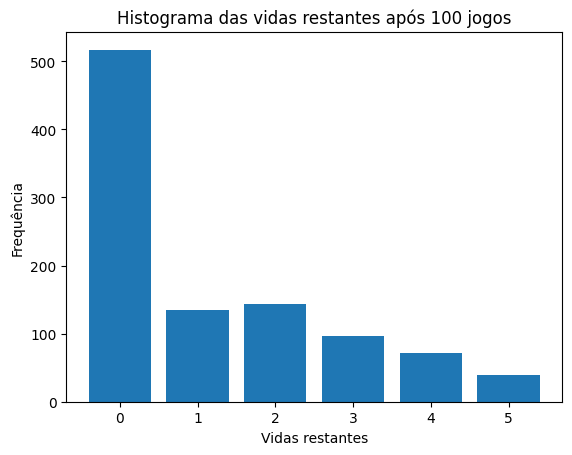

In [20]:
import matplotlib.pyplot as plt
resultados = []
n_jogos = 1000
jogo = JogoDeForca()
for _ in range(n_jogos):
    vidas_restantes = jogar(jogo)
    resultados.append(vidas_restantes)

print(f"Total de jogos: {n_jogos}")
print(f"Jogos ganhos: {sum([1 for vidas in resultados if vidas > 0])}")
print(f"Jogos perdidos: {sum([1 for vidas in resultados if vidas == 0])}")

plt.hist(resultados, bins=range(0, 7), align='left', rwidth=0.8)
plt.xlabel('Vidas restantes')
plt.ylabel('Frequência')
plt.title('Histograma das vidas restantes após 100 jogos')
plt.xticks(range(0, 6))
plt.show()
